In [13]:
import torch
import torch.nn as nn
n_data = torch.ones(100,2)

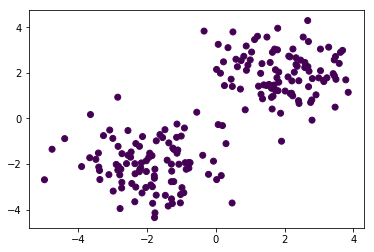

In [26]:
#生成一些随机数用于实验
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
#print(x0)
x1 = torch.normal(-2*n_data,1)
y1 = torch.zeros(100)

x = torch.cat((x0,x1),0).type(torch.FloatTensor)  #将两个向量拼接在一起
y = torch.cat((y0,y1),0).type(torch.FloatTensor)
#print(y)
#画图看一下数据分布
import matplotlib.pyplot as plt
%matplotlib inline
#报错：
#使用可视化库matplotlib绘图时，plt.show()过后只出现<Figure size 640x480 with 3 Axes>而没有生成图片

#解决：
#导入库之后添加以下代码即可

plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy())
plt.show()

In [49]:
#实现逻辑回归
from torch.autograd import Variable
w = Variable(torch.randn(2,1),requires_grad=True)
b = Variable(torch.zeros(1,1),requires_grad=True)
EPOCHS = 200
learning_rata = 0.01
likelihood = []

for epoch in range(EPOCHS):
    a = 1/(1 + torch.exp(-(x.mm(w) + b)))
    #print(a)
    loss = -torch.mean(y*torch.log(a) + (1-y)*torch.log(1-a))
    #print(loss)
    loss.backward()
    likelihood.append(-loss.data.numpy().item())
    w.data = w.data - learning_rata*w.grad
    b.data = b.data - learning_rata*b.grad
    w.grad.data.zero_()
    b.grad.data.zero_()
    #print(w.data,b.data)
    print("交叉熵损失为：{:.3f}".format(loss))

#print(w.data,b.data)
print(w.data, b.data)   

交叉熵损失为：1.809
交叉熵损失为：1.789
交叉熵损失为：1.769
交叉熵损失为：1.749
交叉熵损失为：1.729
交叉熵损失为：1.709
交叉熵损失为：1.690
交叉熵损失为：1.670
交叉熵损失为：1.650
交叉熵损失为：1.631
交叉熵损失为：1.612
交叉熵损失为：1.593
交叉熵损失为：1.573
交叉熵损失为：1.554
交叉熵损失为：1.535
交叉熵损失为：1.517
交叉熵损失为：1.498
交叉熵损失为：1.479
交叉熵损失为：1.461
交叉熵损失为：1.443
交叉熵损失为：1.424
交叉熵损失为：1.406
交叉熵损失为：1.388
交叉熵损失为：1.371
交叉熵损失为：1.353
交叉熵损失为：1.335
交叉熵损失为：1.318
交叉熵损失为：1.301
交叉熵损失为：1.284
交叉熵损失为：1.267
交叉熵损失为：1.250
交叉熵损失为：1.234
交叉熵损失为：1.217
交叉熵损失为：1.201
交叉熵损失为：1.185
交叉熵损失为：1.169
交叉熵损失为：1.153
交叉熵损失为：1.137
交叉熵损失为：1.122
交叉熵损失为：1.107
交叉熵损失为：1.092
交叉熵损失为：1.077
交叉熵损失为：1.062
交叉熵损失为：1.048
交叉熵损失为：1.034
交叉熵损失为：1.020
交叉熵损失为：1.006
交叉熵损失为：0.992
交叉熵损失为：0.979
交叉熵损失为：0.966
交叉熵损失为：0.953
交叉熵损失为：0.940
交叉熵损失为：0.927
交叉熵损失为：0.915
交叉熵损失为：0.903
交叉熵损失为：0.891
交叉熵损失为：0.879
交叉熵损失为：0.868
交叉熵损失为：0.856
交叉熵损失为：0.845
交叉熵损失为：0.834
交叉熵损失为：0.824
交叉熵损失为：0.813
交叉熵损失为：0.803
交叉熵损失为：0.793
交叉熵损失为：0.783
交叉熵损失为：0.774
交叉熵损失为：0.764
交叉熵损失为：0.755
交叉熵损失为：0.746
交叉熵损失为：0.738
交叉熵损失为：0.729
交叉熵损失为：0.721
交叉熵损失为：0.713
交叉熵损失为：0.705
交叉熵损失为：0.697
交叉熵损失为：0.689

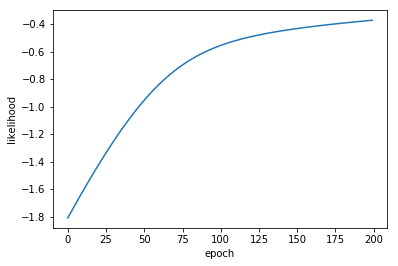

In [50]:
# 画出似然函数的图像
plt.plot(likelihood)
plt.ylabel("likelihood")
plt.xlabel("epoch")
plt.show()

## torch.nn.module写网络结构
